<h1> Healthcare Stroke Dataset </h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import math

<h2> Import Data

In [2]:
stroke = pd.read_csv('train_2v.csv')
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [3]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [4]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
id                   43400 non-null int64
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  41938 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [5]:
stroke['smoking_status'].value_counts()

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [6]:
stroke.groupby(['stroke']).mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
stroke,,,,,,
0,36317.641293,41.741565,0.090598,0.044231,104.021590,28.585371
1,36788.836526,68.143448,0.255428,0.226054,129.582669,29.868118


In [7]:
stroke.bmi.fillna(stroke.bmi.mean(), inplace=True)

stroke.bmi.unique()

array([18.        , 39.2       , 17.6       , 35.9       , 19.1       ,
       50.1       , 17.7       , 27.        , 32.3       , 54.6       ,
       35.        , 22.        , 39.4       , 26.1       , 42.4       ,
       33.        , 19.7       , 22.5       , 24.6       , 25.2       ,
       41.8       , 60.9       , 31.5       , 27.3       , 23.7       ,
       24.5       , 28.4       , 26.9       , 26.7       , 31.2       ,
       25.        , 25.4       , 27.5       , 16.        , 31.6       ,
       25.1       , 30.9       , 24.8       , 23.4       , 29.4       ,
       18.3       , 20.        , 19.5       , 36.        , 27.7       ,
       28.5       , 26.8       , 33.6       , 29.1       , 34.9       ,
       35.3       , 26.4       , 40.1       , 43.1       , 36.7       ,
       29.3       , 21.2       , 36.6       , 21.4       , 27.9       ,
       34.3       , 31.        , 38.7       , 27.6       , 16.5       ,
       22.8       , 35.4       , 24.3       , 25.7       , 21.9 

In [18]:
stroke.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status       13292
stroke                   0
dtype: int64

In [20]:
stroke.groupby(['smoking_status']).sum()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
smoking_status,,,,,,,
formerly smoked,274600022,406706.0,1044,647,835962.96,229280.085126,221
never smoked,584960812,731465.0,1748,604,1688322.83,477913.841747,284
smokes,242299668,305059.0,736,427,702956.58,196175.592899,133


In [21]:
stroke.groupby(['smoking_status']).count()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
smoking_status,,,,,,,,,,,
formerly smoked,7493,7493,7493,7493,7493,7493,7493,7493,7493,7493,7493
never smoked,16053,16053,16053,16053,16053,16053,16053,16053,16053,16053,16053
smokes,6562,6562,6562,6562,6562,6562,6562,6562,6562,6562,6562


<h2> Age & Stroke </h2>

In [53]:
stroke.groupby(stroke.age // 10 * 10).sum()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,,,,,,,
0.0,150251486,18063.6,1,3,395809.47,78787.9,1
10.0,153224273,62788.0,9,1,392467.82,102268.6,1
20.0,189978474,127852.0,51,4,488553.26,144860.3,2
30.0,197907954,189138.0,238,21,535296.68,163622.2,20
40.0,230257181,282271.0,537,132,645872.15,191323.2,42
50.0,249503232,368026.0,901,342,743641.77,204550.2,125
60.0,198615187,346496.0,1018,551,640782.30,158921.6,162
70.0,154577972,321738.0,956,703,519893.82,117052.5,302
80.0,52238819,115884.0,350,305,172234.08,38251.6,128


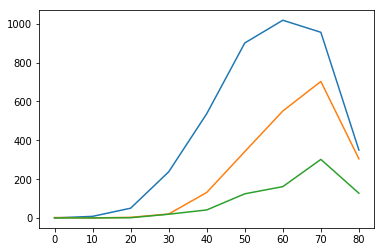

In [8]:
df1 = stroke.groupby(stroke.age // 10 * 10).sum()

plt.plot(df1.index, df1.hypertension)
plt.plot(df1.index, df1.heart_disease)
plt.plot(df1.index, df1.stroke)

In [9]:
stroke.groupby(stroke.age // 10 * 10).mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,,,,,,,
0.0,35064.524154,4.215543,0.000233,0.000700,92.370938,18.867553,0.000233
10.0,36257.518457,14.857549,0.002130,0.000237,92.869811,24.585681,0.000237
20.0,36534.321923,24.586923,0.009808,0.000769,93.952550,28.341835,0.000385
30.0,36167.389254,34.564693,0.043494,0.003838,97.824686,30.576069,0.003655
40.0,36427.334441,44.656067,0.084955,0.020883,102.178793,31.114118,0.006645
50.0,36859.688580,54.369331,0.133107,0.050524,109.859916,31.287823,0.018467
60.0,36787.402667,64.177811,0.188553,0.102056,118.685368,31.093717,0.030006
70.0,35981.837058,74.892458,0.222533,0.163641,121.018115,29.297684,0.070298
80.0,36479.622207,80.924581,0.244413,0.212989,120.275196,27.810668,0.089385


<h2> Gender & Stroke

In [30]:
stroke.groupby(['gender']).sum()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
gender,,,,,,,
Female,931555379,1096863.16,2253,846,2648718.77,737662.327641,431
Male,644609088,735009.44,1808,1216,1884857.25,503486.618332,352
Other,390111,384.00,0,0,975.33,309.720154,0


<h2> Hypertension & Stroke </h2>

In [12]:
stroke.groupby(['hypertension']).sum()

,id,age,heart_disease,avg_glucose_level,bmi,stroke
hypertension,,,,,,
0,1427284047,1583341.6,1547,4022947.37,1.110448e+06,583
1,149270531,248915.0,515,511603.98,1.310108e+05,200


In [13]:
stroke.groupby(['hypertension']).count()#look at this more later on
#P(S|H)= 4.924%
#P(S|NH) = 1.482%
#ratio = 3.323

,id,gender,age,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
hypertension,,,,,,,,,,,
0,39339,39339,39339,39339,39339,39339,39339,39339,39339,26580,39339
1,4061,4061,4061,4061,4061,4061,4061,4061,4061,3528,4061


In [14]:
stroke.groupby(['hypertension']).mean()

,id,age,heart_disease,avg_glucose_level,bmi,stroke
hypertension,,,,,,
0,36281.655533,40.248649,0.039325,102.263590,28.227659,0.014820
1,36757.087171,61.294016,0.126816,125.979803,32.260717,0.049249


In [15]:
def zscoreproportions(n1,n2,p1,p2):
    p = (n1*p1+n2*p2)/(n1+n2)
    stderr = np.sqrt(p*(1-p)*((1/n1)+(1/n2)))
    z = (p1-p2)/stderr
    return z

In [16]:
n1 = 4061
n2 = 39339
p1 = 0.049249
p2 = 0.014820

zscoreproportions(n1,n2,p1,p2)

15.693650367853913

In [17]:
def cohensh(p1,p2):
    phi1 = 2*np.arcsin(np.sqrt(p1))
    phi2 = 2*np.arcsin(np.sqrt(p2))
    h = np.absolute(phi1-phi2)
    return h

In [18]:
cohensh(p1,p2)

0.20348836055520023

<h3> Hypertension Explanation </h3>

H<sub>0</sub> = the proportions of stroke given hypertension and stroke given no hypertension are equal.             
H<sub>a</sub> = the the proportions of stroke given hypertension and stroke given no hypertension are different

alpha = 0.05                                                                                                         
zscore = 1.96

Using a confidence level of 95% we get an alpha zscore of 1.96, therefore our z-score of 15.7 provides significant confidence that we regject the null hypothesis (that the proportions are equal).

The probability of stroke given hypertension P(S|Hyp) = 0.0492                                                       
The probability of stroke given no hypertension P(S|NoHyp) = 0.0148

Therefore, there is a much higher rate of stroke in those with hypertension.

<h4> Cohen's H </h4>

The Cohen's h provides the effect size of between two proportions, the values given by Cohen are as follows:

h = 0.20: "small effect size".                                                                                       
h = 0.50: "medium effect size".                                                                                       
h = 0.80: "large effect size".                                                                                       

Therefore, given the values above, the effect size of hypertension on stroke is small. This does not mean, however, that there is no effect, rather that the effect is small.
